Importing necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh

Implement Diffusion Map

In [2]:
def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _phi = inv_Q_sqrt.dot(v)
    return _lambda, _phi

Implement Fourier analysis

In [3]:
def tk(k, N):
    return (2*math.pi*k) / (N+1)

N = 1000
X = np.zeros((N,2))
tk_arr = np.zeros(N)
for i in range(N):
    k = i+1
    tk_arr[i] = tk(k,N)
    X[i] = (math.cos(tk_arr[i]),math.sin(tk_arr[i]))

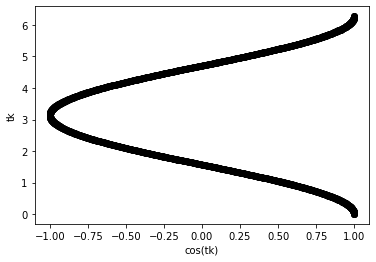

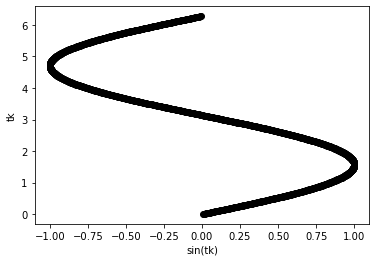

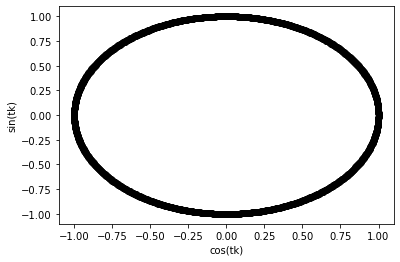

In [17]:
plt.plot(X[:,0], tk_arr, 'o', color='black');
plt.xlabel("cos(tk)")
plt.ylabel("tk")
plt.show()
plt.plot(X[:,1], tk_arr, 'o', color='black');
plt.xlabel("sin(tk)")
plt.ylabel("tk")
plt.show()
plt.plot(X[:,0], X[:,1], 'o', color='black');
plt.xlabel("cos(tk)")
plt.ylabel("sin(tk)")
plt.show()

In [ ]:
_lambda, _phi = create_diffusion_map(X, 4)

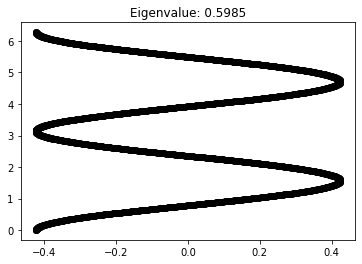

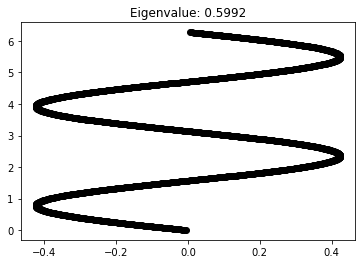

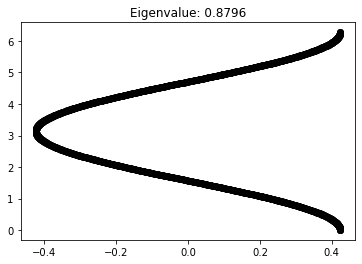

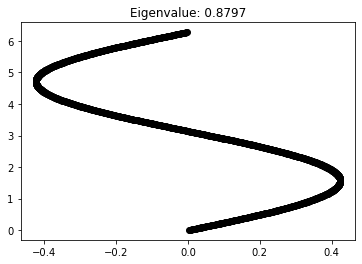

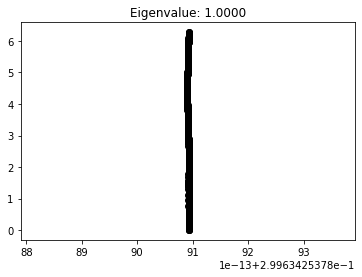

In [7]:
for i in range(_lambda.shape[0]):
    plt.title(f"Eigenvalue: {_lambda[i]:.4f}")
    plt.plot(_phi[:,i], tk_arr, 'o', color='black');
    plt.show()